In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.utils import check_random_state
from sklearn.metrics.pairwise import distance_metrics
import math

In [ ]:
x = np.array([[1,2], [1.5,1.8], [5,8], [8,8], [1,0.6], [9,11]])

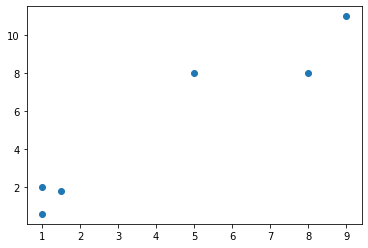

In [ ]:
plt.scatter(x[:,0],x[:,1])
plt.show()

In [ ]:
alpha = 0.456
def min_distance_cluster(point, means, k):
    min_distance = 0
    for i in range(k):
        euc_distance = ((means[i] - point)**2).sum()
        if euc_distance < min_distance :
            min_distance = euc_distance
            cluster = i
            print(cluster)
    return cluster

In [ ]:
def fit(data, k = 2, max_iter = 100):
    means = [] #list of means
    for i in range(k):
        means.append(data[i])
    
    for i in range(max_iter):
        clusters = []
        for j in range(k):
            clusters.append([])
        #assign the data point to the cluster they belong to 
        for point in data:
            #find distance to all_mean values
            distances = [((m - point)**2).sum() for m in means]
            #find the min distance
            minDistance = min(distances)
            #find the mean for which we got the min_distance --- l
            l = distances.index(minDistance)
            #add this point to cluster l
            clusters[l].append(point)
            
        #update new_means
        change = False
        for j in range(k):
            new_mean = np.average(clusters[j], axis = 0)
            if not np.array_equal(means[j],new_mean):
                change = True
            means[j] = new_mean
        if not change:
            break
    return means 

In [ ]:
#

def predict(test_data,means):
    predictions = []
    for point in test_data:
            #find distance to all_mean values
            distances = [((m - point)**2).sum() for m in means]
            #find the min distance
            minDistance = min(distances)
            #find the mean for which we got the min_distance --- l
            l = distances.index(minDistance)
            #add this point to cluster l
            predictions.append(l)
    return predictions
def mean(sil_samples):
    if(np.mean(sil_samples) > 0.4):
        return np.mean(sil_samples)
    else:
        return np.mean(sil_samples)+alpha

In [ ]:
means = fit(x)
#means

In [ ]:
predictions = predict(x,means)
predictions

[0, 0, 1, 1, 0, 1]

In [ ]:
#Silhouttee Score 
def silhouette_score(X, labels, metric='euclidean', sample_size=None,
                          random_state=None, **kwds):
    if sample_size is not None:
        random_state = check_random_state(random_state)
        indices = random_state.permutation(X.shape[0])[:sample_size]
        X, labels = X[indices], labels[indices]          
    return np.mean(silhouette_samples(X, labels, metric=metric, **kwds))


def silhouette_samples(X, labels, metric='euclidean', **kwds):
    metric = distance_metrics()[metric]
    n = labels.shape[0]
    
    A = np.array([_intra_cluster_distance(X, labels, metric, i)
                  for i in range(n)])
    B = np.array([_nearest_cluster_distance(X, labels, metric, i)
                  for i in range(n)])
    sil_samples = (B - A) / np.maximum(A, B)
    return np.nan_to_num(sil_samples)

def metric1(x1, x2):
    return  math.sqrt(((x1-x2)**2).sum())

def _intra_cluster_distance(X, labels, metric, i):
    indices = np.where(labels == labels[i])[0]
    if len(indices) == 0:
        return 0.
    
    a = np.mean([metric1(X[i], X[j]) for j in indices if not i == j])
    return a


def _nearest_cluster_distance(X, labels, metric, i):
    label = labels[i]
    labels = labels.reshape(labels.shape[0],)
    b = np.min(
            [np.mean(
                [metric1(X[i], X[j]) for j in np.where(labels == cur_label)[0]]
            ) for cur_label in set(labels) if not cur_label == label])
    return b

In [ ]:
predictions = np.array(predictions).reshape(-1,1)

In [ ]:
predictions.shape

(6, 1)

In [ ]:
print(silhouette_score(x,predictions))

0.7479566620911685


In [ ]:
#Implementation of Clustering Classes 
class cluster:
    def __init__(self,k = 2, max_iter = 100):
        print("constructor")
        self.k = k
        self.max_iter = max_iter
    
    def fit(self, data):
        self.means = [] #list of means
        for i in range(self.k):
            self.means.append(data[i])
        for i in range(self.max_iter):
            clusters = []
            for j in range(self.k):
                clusters.append([])
            #assign the data point to the cluster they belong to 
            for point in data:
                #find distance to all_mean values
                distances = [((m - point)**2).sum() for m in self.means]
                #find the min distance
                minDistance = min(distances)
                #find the mean for which we got the min_distance --- l
                l = distances.index(minDistance)
                #add this point to cluster l
                clusters[l].append(point)
            #update new_means
            change = False
            for j in range(self.k):
                new_mean = np.average(clusters[j], axis = 0)
                if not np.array_equal(self.means[j],new_mean):
                    change = True
                self.means[j] = new_mean
            if not change:
                break  
    
    def predict(self, test_data):
        predictions = []
        for point in test_data:
                #find distance to all_mean values
                distances = [((m - point)**2).sum() for m in self.means]
                #find the min distance
                minDistance = min(distances)
                #find the mean for which we got the min_distance --- l
                l = distances.index(minDistance)
                #add this point to cluster l
                predictions.append(l)  
        return predictions 

In [ ]:
k_means = cluster(2,10)

constructor


In [ ]:
k_means.fit(x)

In [ ]:
#k_means.predict(x)
print(means)

[array([1.16666667, 1.46666667]), array([7.33333333, 9.        ])]


In [ ]:
k_means.means

[array([1.16666667, 1.46666667]), array([7.33333333, 9.        ])]

In [ ]:
import pandas as pd

In [ ]:
cr = pd.read_csv('crimedata.csv')

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
clf = KMeans(n_clusters = 3)

In [ ]:
pred = clf.fit_predict(x)

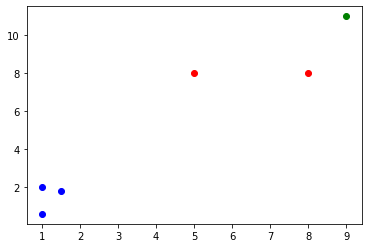

In [ ]:
#for i in range(13):
for i in range(6):
    if(pred[i] == 0):
        plt.scatter(x[i,0],x[i,1],color = 'red')
    elif(pred[i] == 1):
        plt.scatter(x[i,0],x[i,1],color = 'blue')
    elif(pred[i] == 2):
        plt.scatter(x[i,0],x[i,1],color = 'green')